## Analysis and Modelling of King County, WA Home Sale Prices


Authors: Erin Vu and Brian Matsiko

### Overview

This project analyzes the factors that determine housing prices in King County, WA, Seattle. The anlalysis then forms the basis of the model is directed towards assisting the Seattle real estate and housing company with the understanding and structuring their business model with the goal of maximising home sales to the community needs.

## Business Problems

### Aims:

This project aims to:

- Highlight features that appear to have a relationship with King County housing sale prices
- Develop a model that predicts housing prices in King County using the highlighted feature 
- Guide real estate personnel on business development by providing information responsible for real estate investment in specific areas within King County.
           

## Definitions:

- Model:
      The term model referred to through this project is in reference to the linear regression model which we build to explain the variance in home sale prices
- Features:
      Features refer to the independent variables we choose for our model to help predict sale prices
- Target:
      Sale Price is our target variable which our model aims to predict

## Data:

The data used in this project is from the King County Department of Assessments website and can be found here. From this link, you can find the files/tables that were used in this project:

Our analysis was only looking at data from years 2014 and 2015. 

## Table of contents:

- Data Cleaning and Exploratory Data Analysis (EDA)
- Investigate Target Variable: Sales Price
- First Simple Linear Regression Model
- Model Iterations 1 - 6
- Model interpretation
- Claim Validation
- Conclusion

## Analysis Takeaways, Future Investigations and Recommendations:


## Libraries 

In [1]:
from sklearn.preprocessing import PowerTransformer
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics
import pickle
import statsmodels
from statsmodels.formula.api import ols
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

## Data Extraction

In [2]:
kc = pd.read_csv("data/kc_house_data.csv")
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

This section will seek to answer the questions listed in business problems. The data will be visualized for easy understanding and followed with appropriate statistical analysis for empirical findings within data. Following are the summaries of the questions answered in this section: What neighborhood contains most valuable properties? Does condition of the property affect the value? Are the property age and condition related? What features add value to the house? Do renovations increase property value? Do basements increase property value?

## Data Structure

The data set contains mix of continuous and categorical values. They are separated by columns and below is a brief summary of each columns. Further details can be found in King County website.

### Column Description

- id - unique ID for a house
- date - Date day house was sold
- price - Price is prediction target
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms
- sqft_living - square footage of the home
- sqft_lot - square footage of the lot
- floors - Total floors (levels) in house
- waterfront - Whether house has a view to a waterfront
- view - Number of times house has been viewed
- condition - How good the condition is (overall)
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house (apart from basement)
- sqft_basement - square footage of the basement
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- zipcode - zip code in which house is located
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Data Integrity and Description

In [3]:
kc.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For waterfront, view, and yr_renovated, we see that up to 75% of the distribution still remains at a value of 0. As a result, we have decided to fill the NA values in these columns with 0.

In [4]:
#Replace null values and "nan" with 0

kc = kc.replace("nan","0")

col = ['waterfront', 'view', 'yr_renovated']

for val in col:
    kc[val] = kc[val].fillna(value=0)

In [5]:
total_null = 0 
for null_count in kc.isna().sum():
    total_null += null_count
print(f"There are total {total_null} null values in the data")

There are total 0 null values in the data


Checking for duplicate datase

In [6]:
#Check for duplicates
kc_duplicates = kc[kc.duplicated()]
print(len(kc_duplicates))
display(kc_duplicates)

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [7]:
#Check for duplicated IDs 
duplicated_ids = kc.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [8]:
#Explore duplicated IDs
kc_duplicated_ids = kc[duplicated_ids]
kc_duplicated_ids.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


A home's latitude and longitude will not be particularly relevant for prospective homebuyers. Neither will its id,as other data, such as yr_built, will be of much more interest. As a result, we will drop these variables, as they do not make much sense in the context of our business problem.

In [9]:
#Remove features/columns that are of no interest for this analysis 
kc.drop(['id','lat','long'], axis=1, inplace=True)

In [10]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [11]:
#Replacing the question mark values with 0 because majority of the values are 0's and also convert it to integers.
kc['sqft_basement'] = kc['sqft_basement'].replace(to_replace = '?', value = 0.0)
kc['sqft_basement'] = kc['sqft_basement'].astype(str).astype(float)

## Preview Distribution of Each Column

Before we conduct any transformations, we need to check the distributions in order to identify categorical variables and see if/which features are normally distributed.

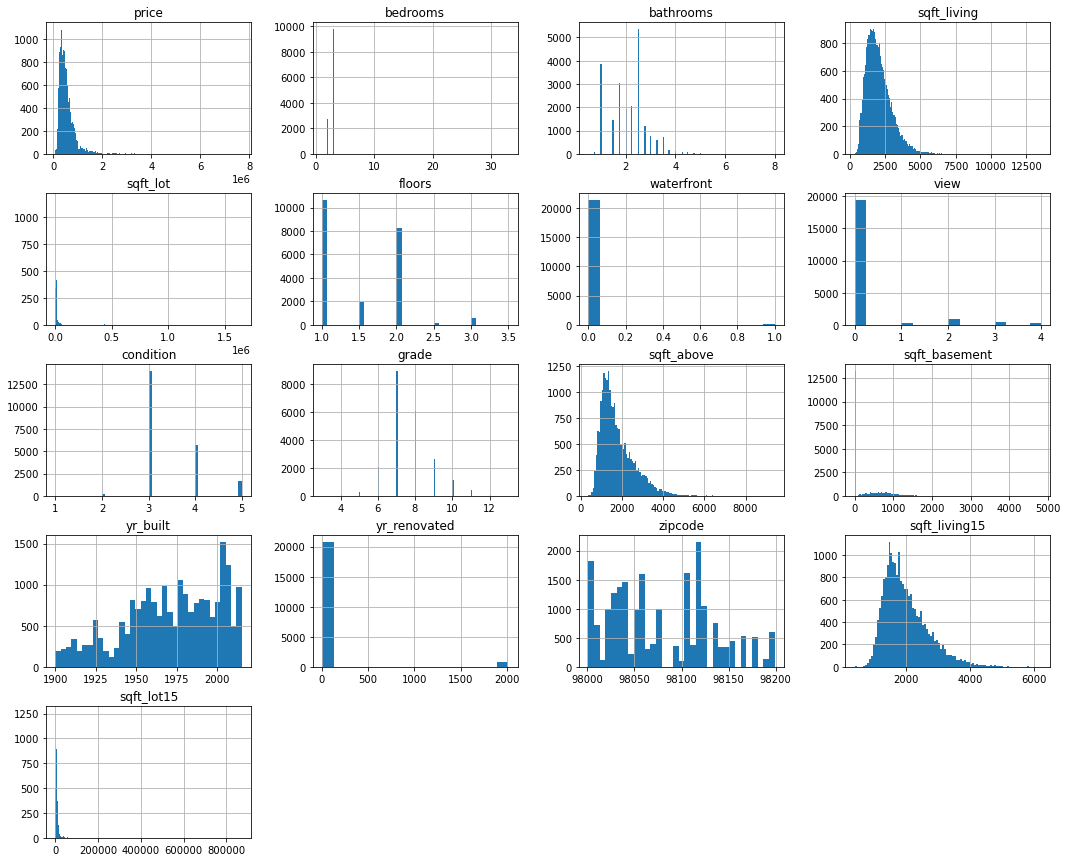

In [12]:
#First, let's plot a histogram for each column
kc.hist(figsize=(18,15), bins='auto');

Bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. The remaining variables seem to be continuous. Let's explore this further by creating some scatter plots.

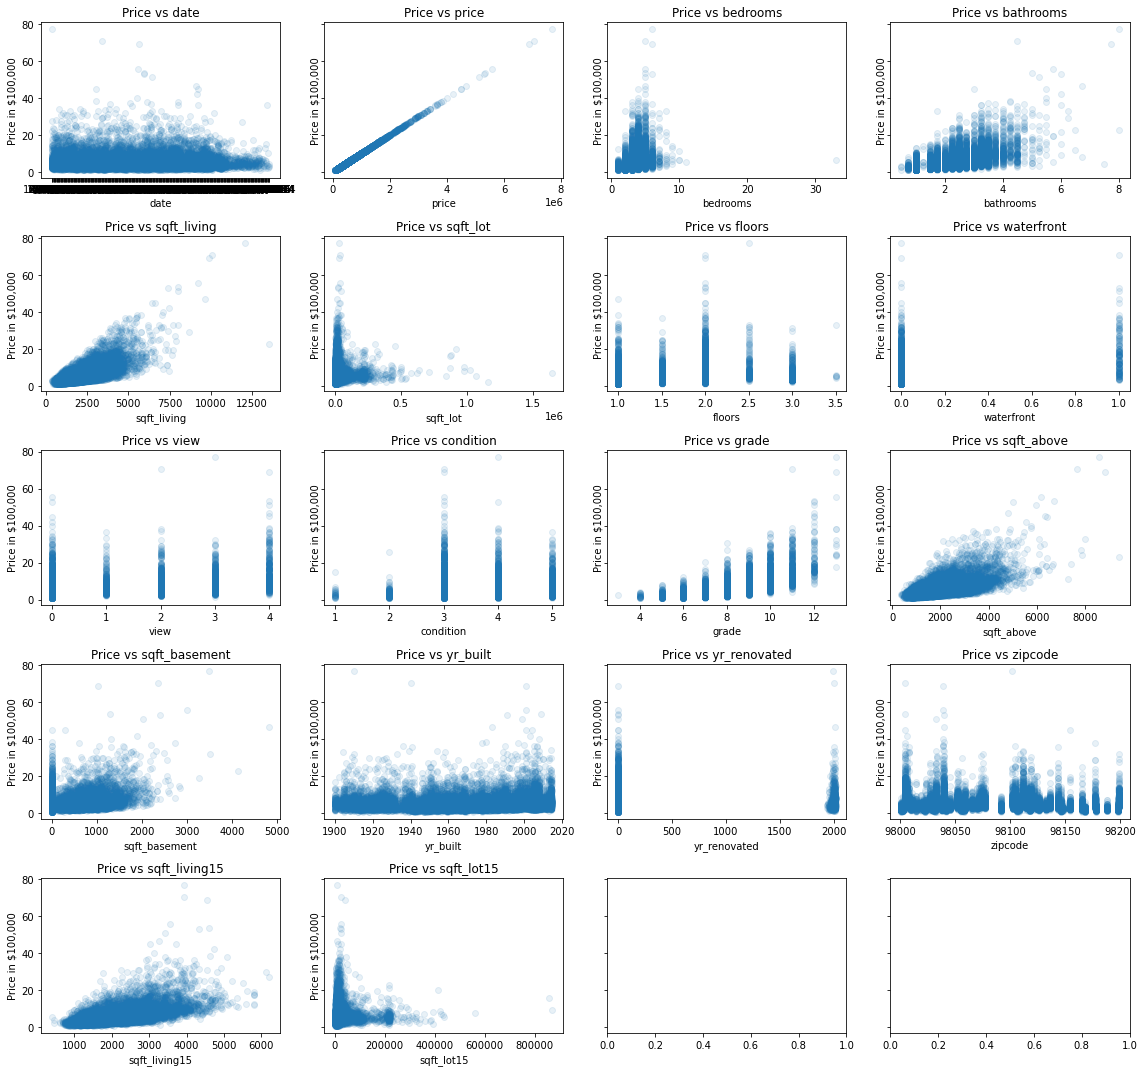

In [13]:
#Next, let's plot scatter plots that will further help us identify outliers and categorical variables 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), kc.columns):
    ax.scatter(kc[column], kc['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

These scatter plots helped confirm which variables are categorical and which are continuous. We have identified our continuous variables, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqft_living15 and sqft_lot15, and later we will look to transform some of these variables, since many of them currently do not appear to follow a normal distribution.

### Data Cleaning

In [14]:
# Creating ['basement'] to replace 'sqft_basement'
kc['basement'] = kc['sqft_basement'].apply(lambda x: 0 if x == 0  else 1)
kc['basement'].value_counts()

0    13280
1     8317
Name: basement, dtype: int64

In [15]:
# Creating 'Age' to replace 'yr_built' 
kc['Age'] = kc['yr_built'].apply(lambda x: 1 if x <= 1999 else 2 if x >= 2000 and x < 2010 else 3)
kc['Age'].value_counts()

1    16841
2     3515
3     1241
Name: Age, dtype: int64

In [16]:
# Creating 'renovated' so sa to replace the 'yr_renovated'
kc['renovated'] = kc['yr_renovated'].apply(lambda x: 1 if x <= 1999 else 2 if x >= 2000 and x < 2010 else 3)
kc['renovated'].value_counts()

1    21218
2      229
3      150
Name: renovated, dtype: int64

In [17]:
# To reduce the number of classes of bedrooms and increase variability 
kc['bedrooms'] = kc['bedrooms'].apply(lambda x: x if x <= 6 else 6)
kc['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     334
1     196
Name: bedrooms, dtype: int64

In [18]:
#Remove features/columns that are of no interest for this analysis 
kc.drop(['sqft_basement','sqft_basement','yr_renovated'], axis=1, inplace=True)

### Correlation Review

Our next logical step would be to investigate correlation amongst variables. First we will look at this more generally, then we will narrow our results to variables that are more highly correlated with our y-variable, price.

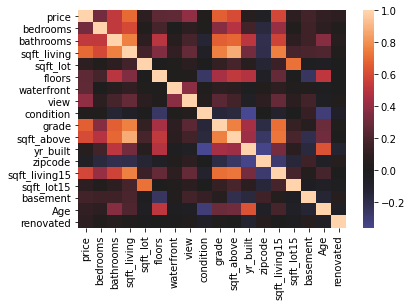

In [19]:
sns.heatmap(kc.corr(), center=0);

In [20]:
#Look at which features are highly correlated with our y-variable, price.
kc.corr()[abs(kc.corr()['price']) > 0.3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,basement,Age,renovated
price,1.000000,0.317063,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,-0.053402,0.585241,0.082845,0.178264,0.109779,0.087107
bedrooms,0.317063,1.000000,0.528382,0.596021,0.034593,0.184539,-0.001682,0.081746,0.024400,0.372097,0.496203,0.167263,-0.162551,0.411354,0.033037,0.160130,0.089769,0.030050
bathrooms,0.525906,0.528382,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.569884,0.088303,0.159863,0.368039,0.054048
sqft_living,0.701917,0.596021,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.756402,0.184342,0.201198,0.215080,0.038399
view,0.393497,0.081746,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.085059,0.278928,0.073083,0.176905,-0.049524,0.030419
grade,0.667951,0.372097,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.447865,-0.185771,0.713867,0.120981,0.050701,0.292342,0.023545
sqft_above,0.605368,0.496203,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,0.424037,-0.261570,0.731767,0.195077,-0.207268,0.313072,0.003890
sqft_living15,0.585241,0.411354,0.569884,0.756402,0.144763,0.280102,0.083823,0.278928,-0.093072,0.713867,0.731767,0.326377,-0.279299,1.000000,0.183515,0.044577,0.181049,-0.008707


We should also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [21]:
kc1 = kc.corr().abs().stack().reset_index().sort_values(0, ascending=False)

kc1['pairs'] = list(zip(kc1.level_0, kc1.level_1))

kc1.set_index(['pairs'], inplace = True)

kc1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
kc1.columns = ['cc']

kc1.drop_duplicates(inplace=True)

kc1[(kc1.cc>.75) & (kc1.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


In [22]:
cat1 = ['view', 'waterfront','renovated', 'Age', 'basement', 'bedrooms', ]

In [23]:
kc

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,basement,Age,renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340,5650,0,1,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690,7639,1,1,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720,8062,0,1,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360,5000,1,1,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800,7503,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,2009,98103,1530,1509,0,2,1
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,2014,98146,1830,7200,0,3,1
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,2009,98144,1020,2007,0,2,1
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,2004,98027,1410,1287,0,2,1


In [24]:
cat1_kc = kc[cat1].astype('category')

In [25]:
cat1_kc = kc[cat1].astype('category')
dummies = pd.get_dummies(cat1_kc, prefix=cat1, drop_first=True)

kc_p1 = kc.drop(cat1, axis=1)

kc_p1 = pd.concat([kc_p1, dummies], axis=1)